# Astrophysics project: Classification of Stars, Galaxies and quasars

The data consists of 10000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/isa229/Astrophysics-project/main/data/skyserver.csv

--2021-12-13 19:10:08--  https://raw.githubusercontent.com/isa229/Astrophysics-project/main/data/skyserver.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1387602 (1.3M) [text/plain]
Saving to: ‘skyserver.csv’

skyserver.csv       100%[===================>]   1.32M  --.-KB/s    in 0.06s   

2021-12-13 19:10:08 (23.9 MB/s) - ‘skyserver.csv’ saved [1387602/1387602]



In [ ]:
data = pd.read_csv("skyserver.csv")

In [ ]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


##Data Description
Terminology:http://www.sdss3.org/dr8/glossary.php#D

Astrometric features:

* ra: is the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth. When paired with declination, these astronomical coordinates specify the location of a point on the celestial sphere in the equatorial coordinate system.
* dec: Declination, in astronomy, the angular distance of a body north or south of the celestial equator. Declination and right ascension, an east-west coordinate, together define the position of an object in the sky. North declination is considered positive and south, negative.
* redshift:  z is a change in the wavelength, frequency and photon energy, of the electromagnetic radiation due to the movement of the object relative to the Earth.

Photometric features:

* u, g, r, i, z: photo https://www.sdss.org/instruments/camera/#MainParameterSummary

Category feature:

* class: Type of object (STAR, GALAXY, PULSAR)

Imaging features:

* objid: A number identifying an object in the image catalog used by the CAS. It is a bit-encoded integer of run, rerun, camcol, field, object.
* run: it identifies the specific scan
* rerun: indicates the reprocessing of the data
* camcol: the SDSS has 6 columns. camcol identifies which column the image belongs to. 
* field:A field is a part of a camcol that is processed by the Photo pipeline at one time, it consists of the frames in the 5 filters for the same part of the sky
* specobjid: A unique bit-encoded 64-bit ID used for optical spectroscopic objects.
* plate: identifies the metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane.  
* mjd: Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid: id of the optical fiber used to direct the light at the focal plane from individual objects to the slithead of the spectrograh.

In [ ]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
#Check the types
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [ ]:
#Check if there is null data
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [ ]:
## After studying the data, I realize the imaging features are not necessary to identify the object, so they are going to be dropped.

clean_data = data[["u","g","r","i","z","redshift","class"]]

In [ ]:
features = ["u","g","r","i","z","redshift"]
target = "class"

### Boxplot visualization of features

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

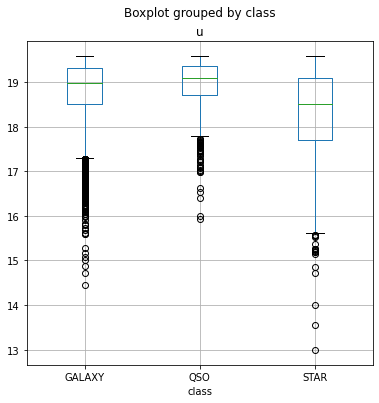

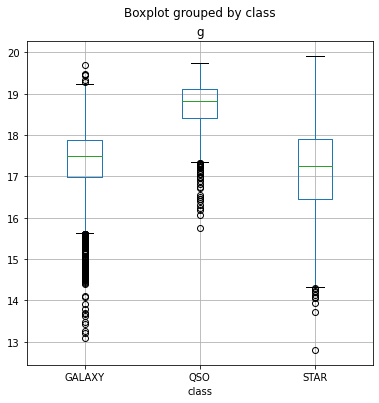

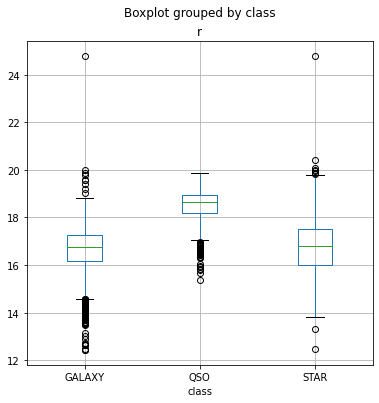

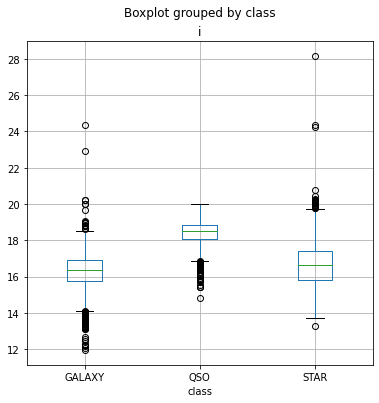

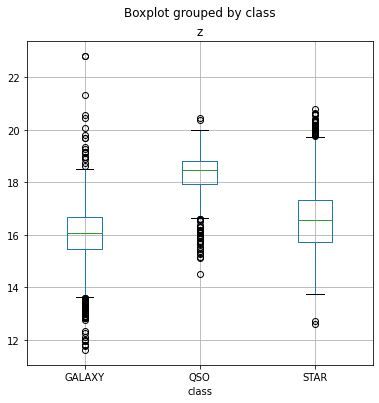

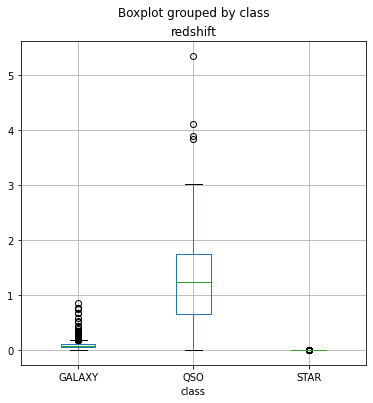

In [ ]:
for col in features:
  data.boxplot(col, by="class", figsize=(6,6))
  plt.title(col)
plt.show()

### Pairplots

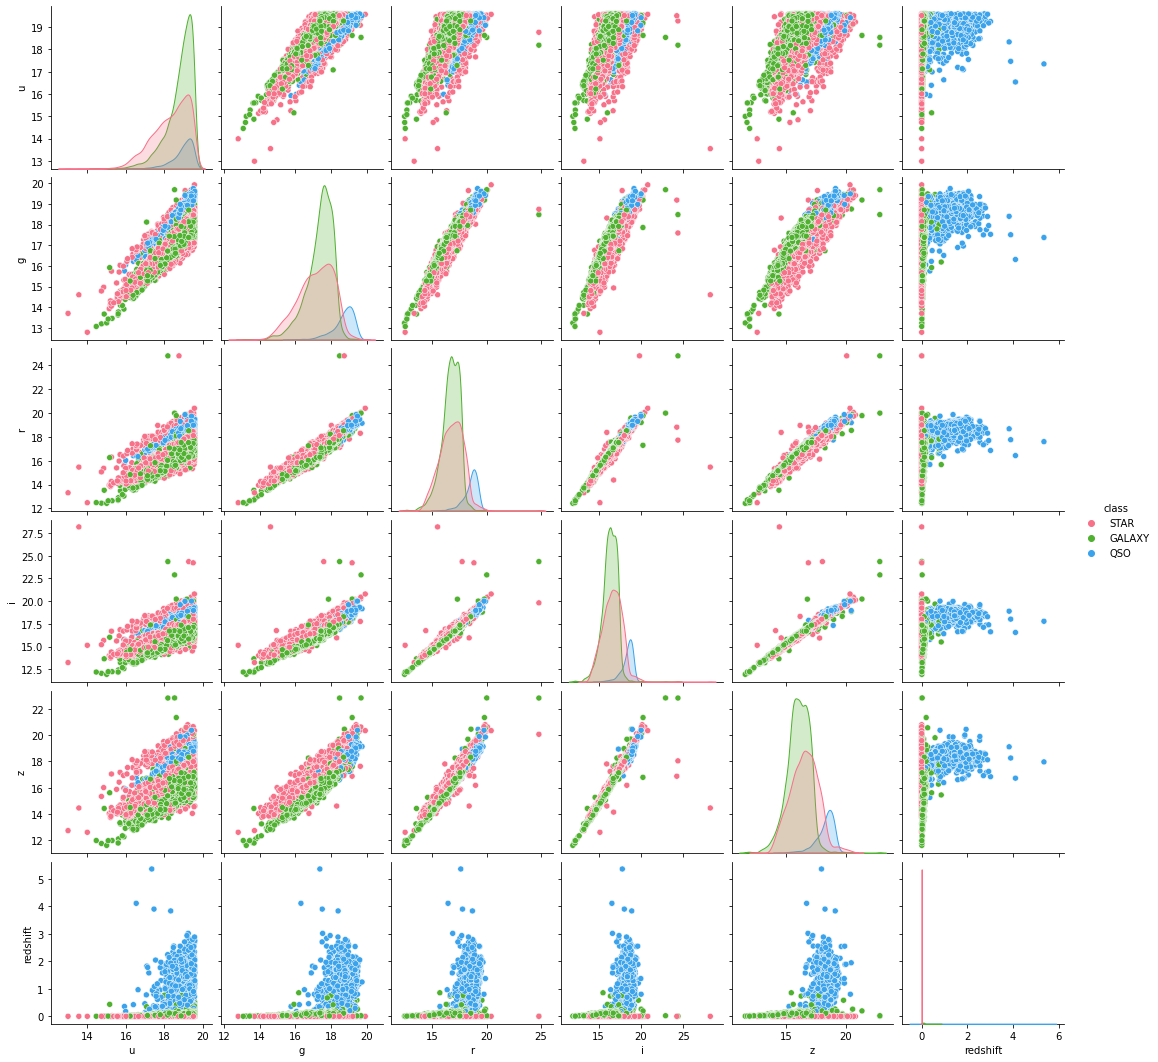

In [ ]:
import seaborn as sns

pp = sns.pairplot(clean_data, hue="class", palette="husl")

In [ ]:
clean_data[target].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [ ]:
clean_data[target].value_counts(normalize="True")

GALAXY    0.4998
STAR      0.4152
QSO       0.0850
Name: class, dtype: float64

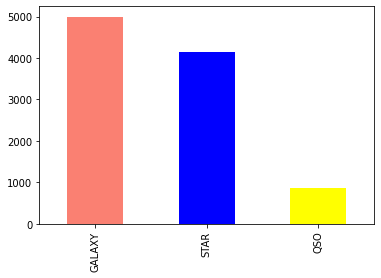

In [ ]:
clean_data[target].value_counts().plot(kind="bar", color=["salmon", "blue", "yellow"]);

## Preprocessing

In [ ]:
factor = pd.factorize(clean_data["class"])
factor

(array([0, 0, 1, ..., 0, 1, 1]),
 Index(['STAR', 'GALAXY', 'QSO'], dtype='object'))

In [ ]:
clean_data["class"] = factor[0]
definitions = factor[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(clean_data["class"].head())

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64


In [ ]:
print(definitions)

Index(['STAR', 'GALAXY', 'QSO'], dtype='object')


### Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = clean_data.drop("class", axis=1)

In [ ]:
y = clean_data["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = "entropy", random_state=42)
classifier.fit(X_train, y_train);

## Evaluating model

In [ ]:
### Getting the score
classifier.score(X_test, y_test)

0.9895

In [ ]:
###Reverse factorize
y_preds = classifier.predict(X_test) 

reverse_factor = dict(zip(range(3), definitions))
y_test_v = np.vectorize(reverse_factor.get)(y_test)
y_preds_v = np.vectorize(reverse_factor.get)(y_preds)

#Making confussion matrix
pd.crosstab(y_test_v , y_preds_v, rownames= ["Actual object"], colnames=["Predicted object"])

Predicted object,GALAXY,QSO,STAR
Actual object,,,
GALAXY,1014,6,5
QSO,9,130,1
STAR,0,0,835


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds, target_names=definitions))

              precision    recall  f1-score   support

        STAR       0.99      1.00      1.00       835
      GALAXY       0.99      0.99      0.99      1025
         QSO       0.96      0.93      0.94       140

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000

